<a href="https://colab.research.google.com/github/sayali1004/BDA594/blob/main/Microsoft_Stock_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns


In [ ]:
df=pd.read_csv('/MicrosoftStock (2).csv')
print(df.head())

    index        date   open   high    low  close    volume  Name
0  390198  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  390199  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  390200  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  390201  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  390202  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT


In [ ]:
df.shape

(1259, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [ ]:
df.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


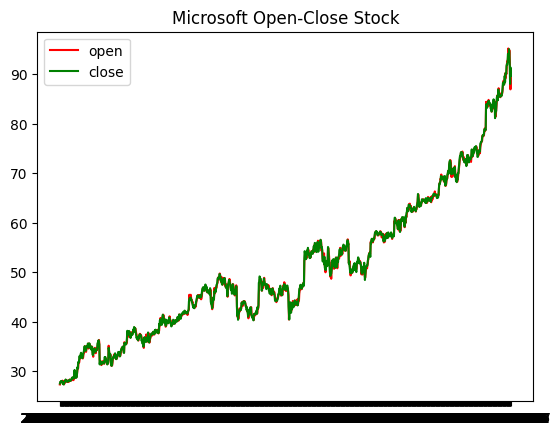

In [ ]:
plt.plot(df['date'],
		df['open'],
		color="red",
		label="open")
plt.plot(df['date'],
		df['close'],
		color="green",
		label="close")
plt.title("Microsoft Open-Close Stock")
plt.legend()


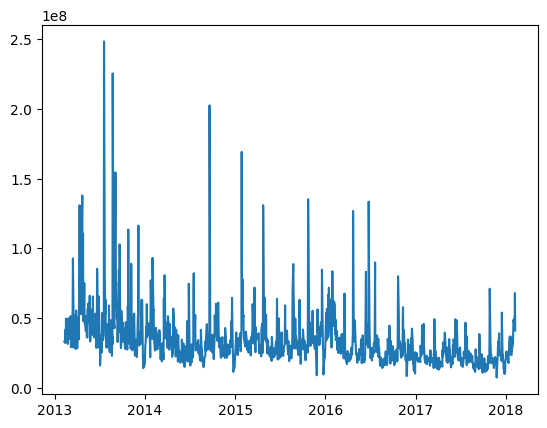

In [ ]:
plt.plot(df['date'],
		df['volume'])
plt.show()


In [ ]:
dfnew=df.drop(['Name'], axis=1)
print(dfnew.head())

    index       date   open   high    low  close    volume
0  390198 2013-02-08  27.35  27.71  27.31  27.55  33318306
1  390199 2013-02-11  27.65  27.92  27.50  27.86  32247549
2  390200 2013-02-12  27.88  28.00  27.75  27.88  35990829
3  390201 2013-02-13  27.93  28.11  27.88  28.03  41715530
4  390202 2013-02-14  27.92  28.06  27.87  28.04  32663174


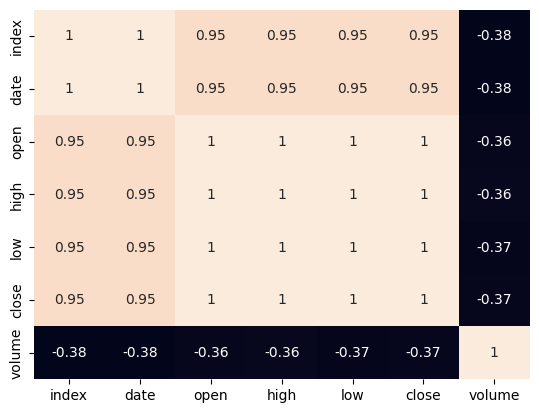

In [ ]:
sns.heatmap(dfnew.corr(), annot=True, cbar=False)
plt.show()


Text(0.5, 1.0, 'Microsoft Stock Prices')

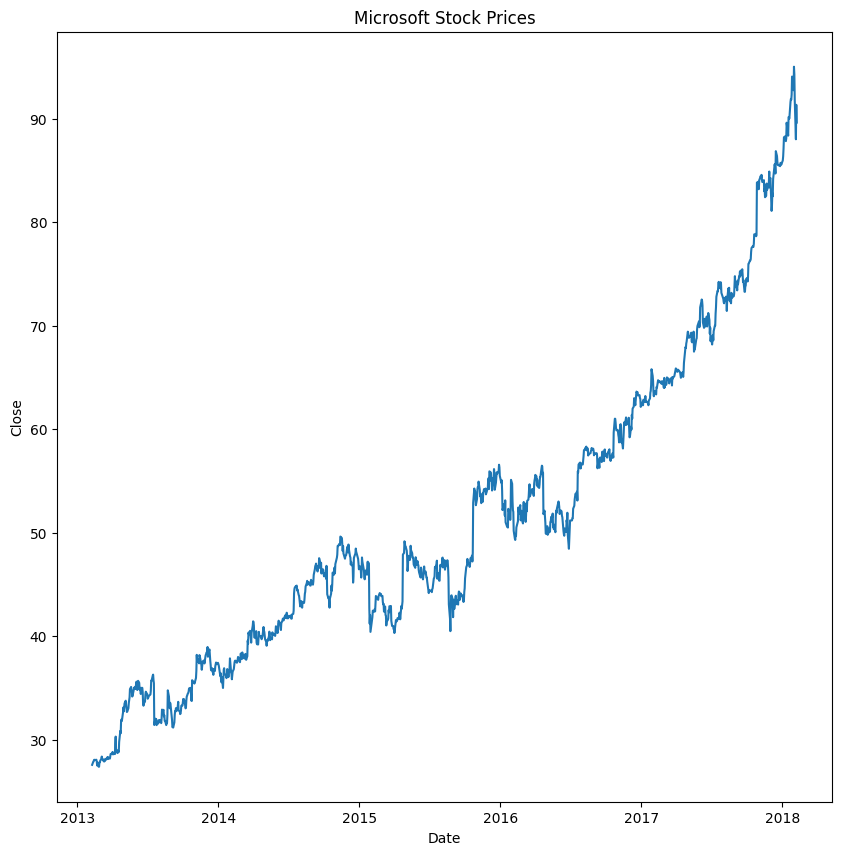

In [ ]:
df['date'] = pd.to_datetime(df['date'])
prediction = df.loc[(df['date']
							> datetime(2013, 1, 1))
							& (df['date']
							< datetime(2018, 1, 1))]

plt.figure(figsize=(10, 10))
plt.plot(df['date'], df['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")


In [ ]:
msft_close = df.filter(['close'])
dataset = msft_close.values  # Convert to numpy array

# Calculate the index to split the dataset for training (95% of the data)
training = int(np.ceil(len(dataset) * 0.95))  # Corrected this line

# Scale the data using StandardScaler
ss = StandardScaler()
dataset_scaled = ss.fit_transform(dataset)  # Fit and transform the data

# Create training data from the scaled dataset
train_data = dataset_scaled[0:int(training), :]  # Use only the training portion

x_train = []
y_train = []

# Considering 60 as the batch size, create the X_train and y_train
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape x_train to be in the required format for LSTM or similar models
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


build the model

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape
							=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam  # Importing optimizer explicitly

# Compile the model
model.compile(optimizer=Adam(),  # Correct instantiation of Adam optimizer
              loss='mae',
              metrics=[RootMeanSquaredError()])  # Metrics should be a list

# Train the model
history = model.fit(x_train, y_train,  # Use 'x_train' and 'y_train' as defined in the earlier code
                    epochs=20)


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.3397 - root_mean_squared_error: 0.4714
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.1087 - root_mean_squared_error: 0.1482
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.1027 - root_mean_squared_error: 0.1368
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0943 - root_mean_squared_error: 0.1267
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0884 - root_mean_squared_error: 0.1195
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0860 - root_mean_squared_error: 0.1179
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0891 - root_mean_squared_error: 0.1200
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0894 - root_mean_squared_error: 0.1184
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0828 - root_mean_squared_error: 0.1114
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0867 - root_mean_squared_error: 0.1195

In [ ]:
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(testing)):
	x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test,
					(x_test.shape[0],
					x_test.shape[1], 1))

pred = model.predict(X_test)


TypeError: 'StandardScaler' object is not subscriptable

In [ ]:
# Testing set: scale the last portion of the dataset, starting 60 points before 'training'
testing = ss[training - 60:, :]

x_test = []
y_test = dataset[training:, :]  # True values for comparison

# Prepare the x_test data, which contains sequences of 60 timesteps from the testing set
for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])

# Convert x_test to a numpy array
x_test = np.array(x_test)

# Reshape x_test to match LSTM input requirements (samples, timesteps, features)
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate predictions
pred = model.predict(X_test)

# Now 'pred' contains the predicted stock prices


TypeError: 'StandardScaler' object is not subscriptable

In [ ]:
# Scale the dataset using StandardScaler
ss = StandardScaler()
scaled_data = ss.fit_transform(dataset)  # Store the scaled data, not the StandardScaler object

# Testing set: scale the last portion of the dataset, starting 60 points before 'training'
testing = scaled_data[training - 60:, :]  # Now using the correctly scaled data

x_test = []
y_test = dataset[training:, :]  # True values for comparison

# Prepare the x_test data, which contains sequences of 60 timesteps from the testing set
for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])

# Convert x_test to a numpy array
x_test = np.array(x_test)

# Reshape x_test to match LSTM input requirements (samples, timesteps, features)
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Generate predictions
pred = model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step


In [ ]:
train = microsoft[:training]
test = microsoft[training:]
test['Predictions'] = pred

plt.figure(figsize=(10, 8))
plt.plot(train['close'], c="b")
plt.plot(test[['close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])


NameError: name 'microsoft' is not defined

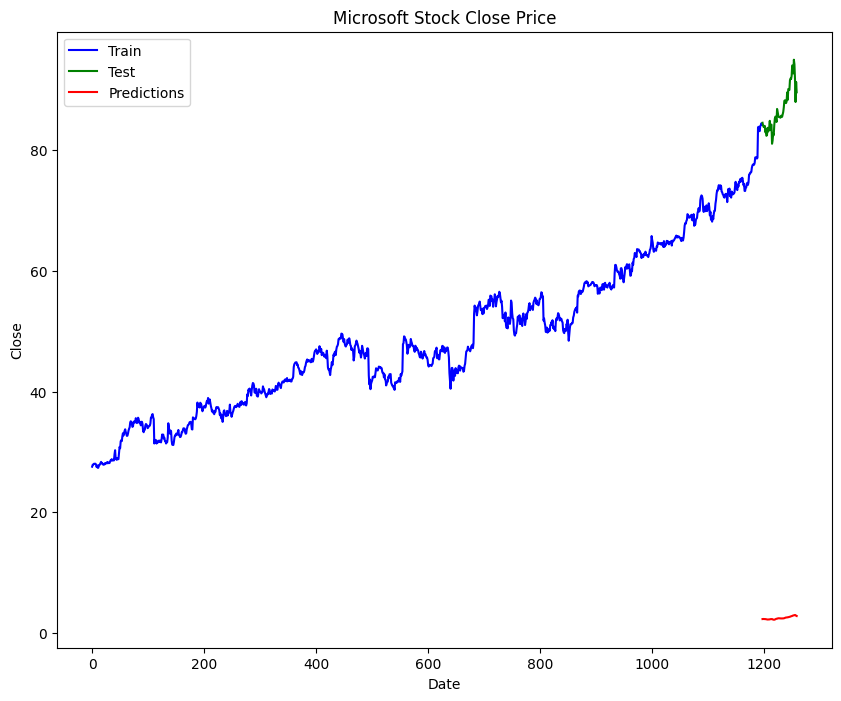

In [ ]:
# Split the data into training and testing sets
train = df[:training]
test = df[training:].copy()  # Create a copy to avoid SettingWithCopyWarning

# Add predictions to the test DataFrame
test['Predictions'] = pred

# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(train['close'], c="b", label='Train')  # Plot the training data
plt.plot(test['close'], c="g", label='Test')  # Plot the true test data
plt.plot(test['Predictions'], c="r", label='Predictions')  # Plot the predicted values

# Set the title and labels
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.xlabel("Date")

# Add a legend to identify the lines
plt.legend(['Train', 'Test', 'Predictions'])

# Show the plot
plt.show()
